In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import re

## Data fields

SalePrice - the property's sale price in dollars. This is the target variable 

that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits


Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [2]:
train=pd.read_csv('train.csv',sep = ',')
test = pd.read_csv('test.csv', sep = ',')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

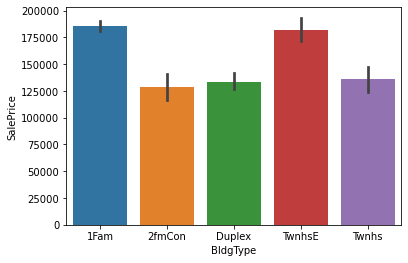

In [3]:
sns.barplot(data = train, x = 'BldgType', y = 'SalePrice')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('train 데이터의 결측값 :',train.isnull().sum())
print('test 데이터의 결측값 :',test.isnull().sum())

train 데이터의 결측값 : Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
test 데이터의 결측값 : Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [6]:
print('train의 형태 :',train.shape)
print('test의 형태 :' ,test.shape)
target = train.iloc[:,-1]
target

train의 형태 : (1460, 81)
test의 형태 : (1459, 80)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

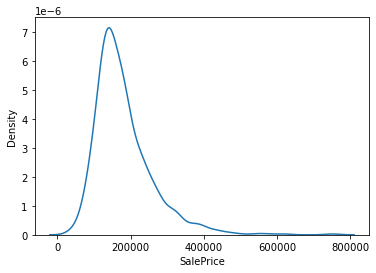

In [8]:
sns.kdeplot(x = train['SalePrice'])

<AxesSubplot:>

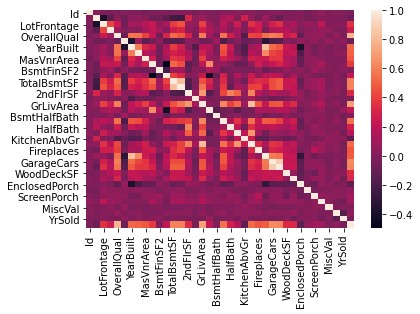

In [9]:
corrmat=train.corr()
plt.figsize = (16,8)
sns.heatmap(corrmat)

In [10]:
def sub_function(x):
    a=set(train[x].unique())
    b =set(test[x].unique())
    a =a.difference(test[x])
    b =b.difference(train[x])
    print(f'train_set 에만 있는 값 {a}')
    print(f'test_set 에만 있는 값 {b}')

# MSSubClass(빌딩의 종류)

In [11]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

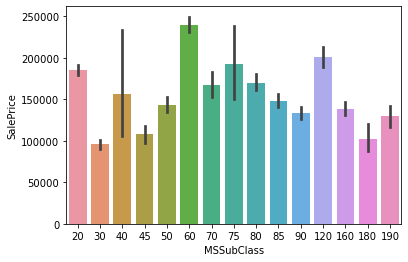

In [12]:
sns.barplot(x = train['MSSubClass'], y = train['SalePrice'], hue_order = train['MSSubClass'])
plt.show()

- 가격과 비교해봤을 때 75번과 40번의 이상치가 큰 것을 확인할 수 있다.

In [13]:
sub_function('MSSubClass')

train_set 에만 있는 값 set()
test_set 에만 있는 값 {150}


## MSZoning(일반 구역 분류)

In [14]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

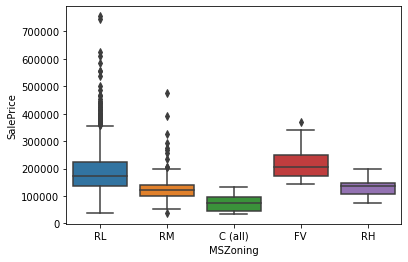

In [15]:
sns.boxplot(data = train, x = 'MSZoning', y = 'SalePrice')
# RL이 가장 많은 이상치를 보유하고 있다.

- RH : 주거 고밀도
- RL : 주거 저밀도
- RM : 주거 중간 밀도
- FV : 플로팅 빌리지 주거
- C : 상업

<AxesSubplot:xlabel='MSZoning', ylabel='YearBuilt'>

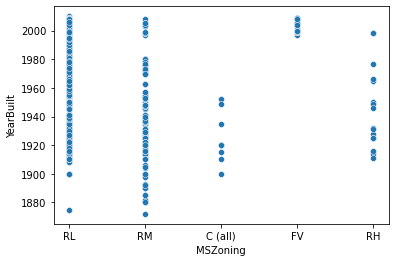

In [16]:
sns.scatterplot(data = train, x = 'MSZoning', y = 'YearBuilt')

In [17]:
sub_function('MSZoning')
# test 값에는 nan값이 있다.

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan}


## LotFrontage(부동산에 연결된 거리의 선형 피트)

In [18]:
train.LotFrontage.isnull().sum()

259

In [19]:
train.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

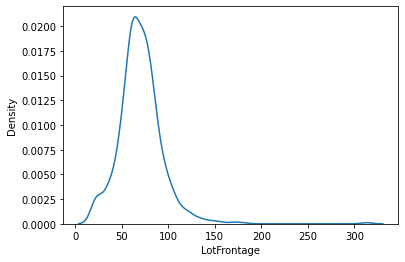

In [20]:
sns.kdeplot(data = train, x = 'LotFrontage')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

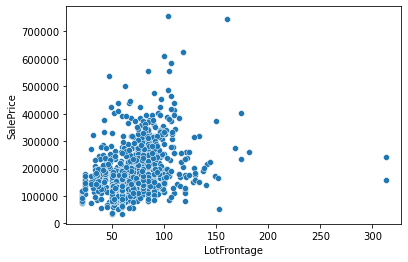

In [21]:
sns.scatterplot(data = train, x = 'LotFrontage', y = 'SalePrice')

#### LotFrontage는 50~ 90사이에 많은 데이터가 분포하고 있다.
#### LotFrontage는 259개의 누락값을 갖고있다.
#### 특정 지역에서 값이 크게 치솟는 것을 알 수 있다.

## LotArea (평방 피트 단위의 로트 크기)

In [22]:
train.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [23]:
# 결측치는 없다.
train.LotArea.isnull().sum()

0

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

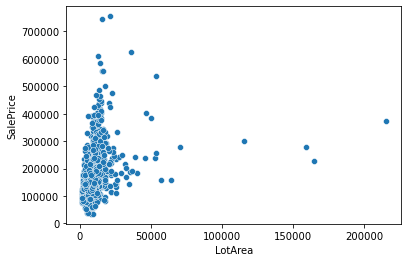

In [24]:
sns.scatterplot(data = train, x = 'LotArea', y = 'SalePrice')

In [25]:
# map을 이용하여 np.log(x)씌워줘서 정규화 시켜주기
train['LotArea_log'] = train.LotArea.map(lambda x: np.log(x))

<AxesSubplot:xlabel='LotArea_log', ylabel='Density'>

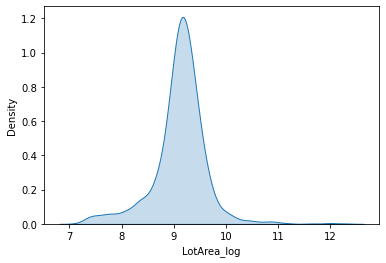

In [26]:
sns.kdeplot(train['LotArea_log'], shade = True)

<AxesSubplot:xlabel='LotArea_log', ylabel='SalePrice'>

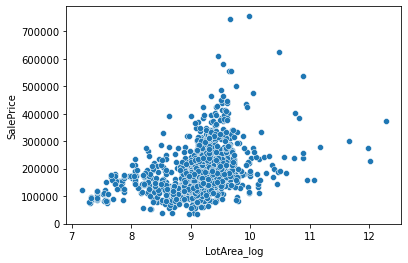

In [27]:
sns.scatterplot(data = train, x = 'LotArea_log', y = 'SalePrice')
# 정규화를 해주고 그래프를 보니 조금의 차이가 있다는것을 확인할 수 있을 것 같다.

<AxesSubplot:>

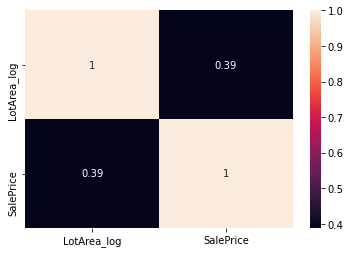

In [28]:
corr_map = train[['LotArea_log','SalePrice']].corr()
sns.heatmap(corr_map, annot = True)

- 0.39로 높은 선형관계가 있다고 할 수는 없다.

## Street

In [29]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

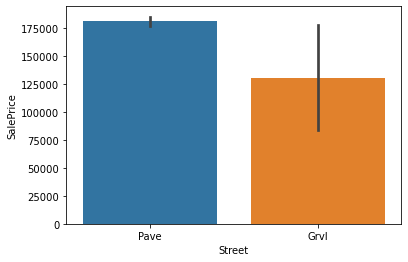

In [30]:
sns.barplot(data = train, x = 'Street', y = 'SalePrice')
# Pave는 포장길로 Grvl보다 높은 집값이 형성되어있다.
# 그리고 Grvl은 이상치가 너무 심하다. 즉 다른 변수가 있다고 생각된다.

In [31]:
# train과 test의 값이 일치함
sub_function('Street')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## Alley(골목 접근 유형)

In [32]:
train.Alley.isnull().sum()

1369

In [33]:
train.shape
# 1460개의 데이터중에 1369개의 데이터로 예측을 할 수 없다는 판단임으로 데이터를 나중에 지우도록 하자.
train.drop('Alley', axis = 1, inplace = True)
test.drop('Alley', axis = 1, inplace = True)

## LotShape

In [34]:
train.LotShape
train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

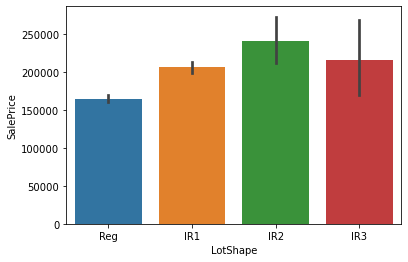

In [35]:
sns.barplot(data = train, x = 'LotShape', y = 'SalePrice')
# 그래프를 봤을 때 이건 두개의 변수를 비교할 때 한번 사용해 봐야 겠다.

- Reg : 보통
- IR1 : 약간 불규칙
- IR2 : 보통 불규칙
- IR2 : 불규칙

In [36]:
sub_function('LotShape')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## LandContour(

In [37]:
train.LandContour
train.LandContour.value_counts() 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

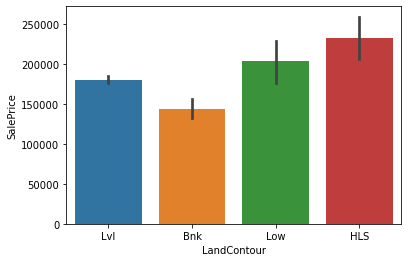

In [38]:
sns.barplot(data = train, x = 'LandContour', y = 'SalePrice')
# 이것도 다른 변수와 비교해 봐야 할 것같다.

- Lv1 : 레벨 근처의
- Bnk : 도로 등급에서 건물까지 신속하고 중요한 상승
- 

In [39]:
sub_function('LandContour')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## Utilities

In [40]:
train.Utilities
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
# 이 column도 데이터가 많은 정보를 담고 있지 않은 것 같다. 지워주도록 하자.
train.drop('Utilities', axis = 1, inplace = True)
test.drop('Utilities', axis = 1, inplace = True)

## LotConfig(로트 구성 내부 인사이드 로트 코너 부지)

In [42]:
train.LotConfig
train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

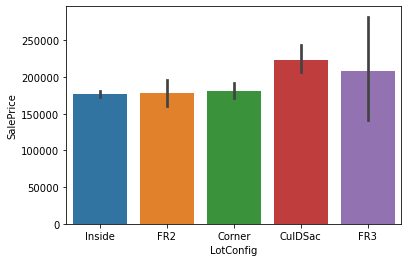

In [43]:
sns.barplot(data = train, x = 'LotConfig', y = 'SalePrice')

In [44]:
sub_function('LotConfig')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## LandSlope(경사)

In [45]:
train.LandSlope
train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

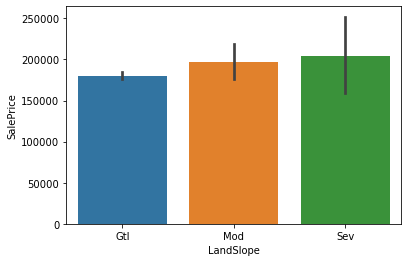

In [46]:
sns.barplot(data = train, x='LandSlope',y = 'SalePrice')

- Gtl : 완만한 경사
- Mod : 적당한 경사
- Sev : 심한 경사

In [47]:
sub_function('LandSlope')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## Neighborhood

In [48]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

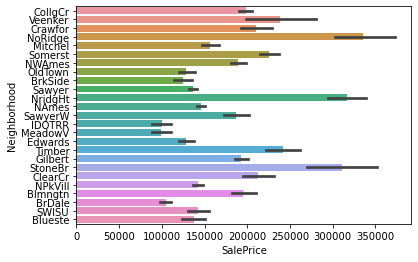

In [49]:
sns.barplot(data = train, y = 'Neighborhood', x = 'SalePrice')
plt.figsize = (30,8)

- 상관성이 매우 높다고 판단된다

# Condition1

In [50]:
train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

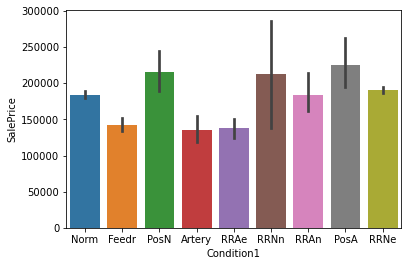

In [51]:
sns.barplot(data = train, x = 'Condition1', y = 'SalePrice')

- RRNn : 이상치가 높게 측정된다.

In [52]:
mat_corr = train[['Condition1','SalePrice']].corr()
print(mat_corr)

           SalePrice
SalePrice        1.0


## Condition2

In [53]:
train.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

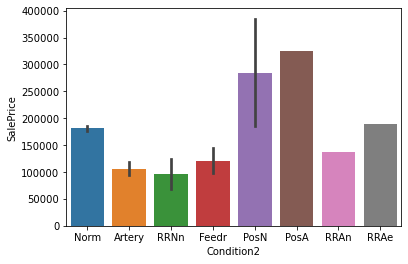

In [54]:
sns.barplot(data = train, x = 'Condition2', y = 'SalePrice')
# 가치있는 column으로 보기는 어려울 것 같다.

In [55]:
sub_function('Condition2')

train_set 에만 있는 값 {'RRAn', 'RRNn', 'RRAe'}
test_set 에만 있는 값 set()


## BldgType

In [56]:
train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

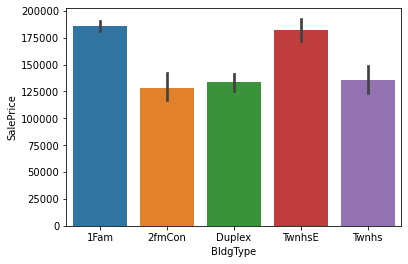

In [57]:
sns.barplot(data = train, x = 'BldgType', y = 'SalePrice')

- 1Fam : 분리 된 단일 가족
- 2FmCfEon : 두 가족 개종; 원래 1 가구 주택으로 지어졌습니다.
- 

In [58]:
sub_function('BldgType')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## HouseStyle(주거 스타일)

In [59]:
train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

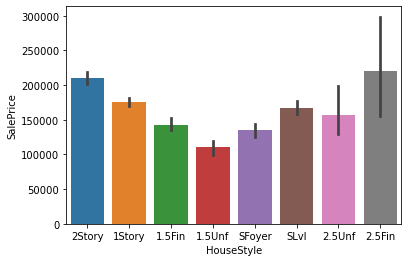

In [60]:
sns.barplot(data = train, x = 'HouseStyle', y = 'SalePrice')

In [61]:
sub_function('HouseStyle')

train_set 에만 있는 값 {'2.5Fin'}
test_set 에만 있는 값 set()


## OverallQual

In [62]:
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [63]:
# train.OverallQual=train.OverallQual.astype('str')
# test.OverallQual = test.OverallQual.astype('str')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

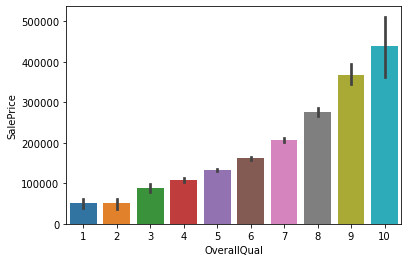

In [64]:
sns.barplot(data =train, x = 'OverallQual', y ='SalePrice', hue_order = 'OverallQual')

In [65]:
sub_function('OverallQual')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## OverallCond(주택의 전반적인 상태)

In [66]:
train.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

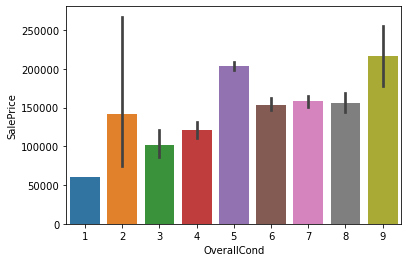

In [67]:
sns.barplot(data = train, x = 'OverallCond',y = 'SalePrice', hue_order = 'OverallCond')

- 그래프에서 위에 있을수록 좋은 가격이다 라고 설명할 수는 없다.
- 그러나 아래쪽 가격보단 윗쪽 가격이 좋은건 확인할 수 있다.
- 그렇게 되면 어떤 다른 변수가 같이 포함된다면 좋은 결과가 나올것이다.

## YearBuilt(설립연도)

In [68]:
train.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

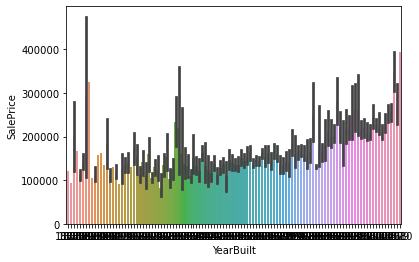

In [69]:
sns.barplot(data = train, x = 'YearBuilt', y =  'SalePrice')

<AxesSubplot:>

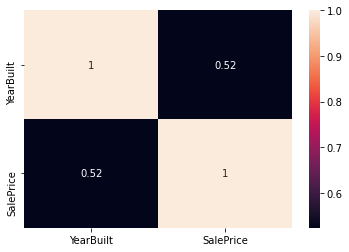

In [70]:
train_year = train[['YearBuilt','SalePrice']].corr()
sns.heatmap(train_year, annot = True)

- 지어진 연도가 가까울수록 더 높은 가격을 형성한다.
- 우리는 지어진 연도보다는 지금 연도에서 뺀 값을 기준으로 나는 그렇게 나타낼 예정이다.

In [71]:
def old_year(x):
    x= 2021 - x
    return x
train['YearBuilt_old'] = train['YearBuilt'].apply(old_year)

In [72]:
train['YearBuilt_old']

0        18
1        45
2        20
3       106
4        21
       ... 
1455     22
1456     43
1457     80
1458     71
1459     56
Name: YearBuilt_old, Length: 1460, dtype: int64

In [73]:
sub_function('YearBuilt')

train_set 에만 있는 값 {1872, 1875, 1882, 1885, 1892, 1893, 1898, 1904, 1906, 1908, 1911, 1913}
test_set 에만 있는 값 {1895, 1896, 1901, 1902, 1907, 1879}


- 오래 되었던 건물들 위주로 train셋에만 있거나 test셋에만 있는 경향이 있다.

<AxesSubplot:>

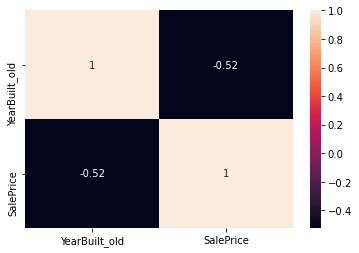

In [74]:
train_old = train[['YearBuilt_old', 'SalePrice']].corr()
sns.heatmap(train_old, annot = True)

- 바꾼것이랑 안바꾼것이랑 다르다고 보기는 어려울 것 같다.

## YearRemodAdd(개조 또는 추가가 없는 경우 공사 날짜와 동일)

In [75]:
train.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

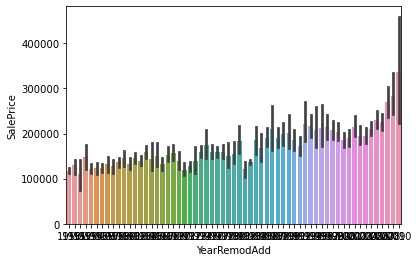

In [76]:
sns.barplot(data = train, x = 'YearRemodAdd', y = 'SalePrice')

<AxesSubplot:>

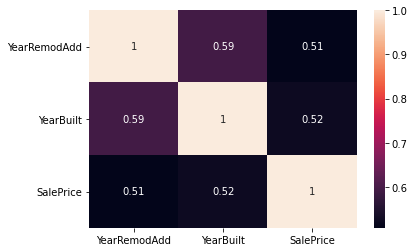

In [77]:
train_year_old = train[['YearRemodAdd','YearBuilt','SalePrice']].corr()
sns.heatmap(train_year_old, annot = True)

- 신기하게 강한 연관성을 들어내지는 않는다. ex) 0.7이상
- 그러면 이 변수를 가지고 가야하는 고민이 생기게 된다.
- 내 예상에는 yearremodadd가 더 많은 연관성이 있을 줄 알았는데 yearbuilt가 더 높은연관성을 나타내는것 같다.

In [78]:
sub_function('YearRemodAdd')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


- YearBuilt에서 train셋에만 혹은 test셋에만 있는 연식은 전부 remodeling이 되었다.

## RoofStyle(천장 스타일)

In [79]:
train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

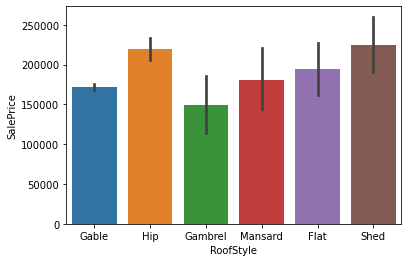

In [80]:
sns.barplot(data = train, x = 'RoofStyle',y = 'SalePrice')

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

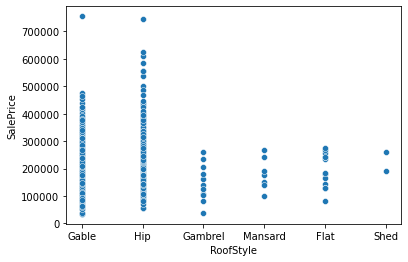

In [81]:
sns.scatterplot(data= train, x = 'RoofStyle',y = 'SalePrice')

- 이상치를 어떻게 제거해 줄지는 생각해 봐야겠다.

In [82]:
sub_function('RoofStyle')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## RoofMatl(천장재료)

In [83]:
train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [84]:
train.RoofMatl.isnull().sum()

0

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

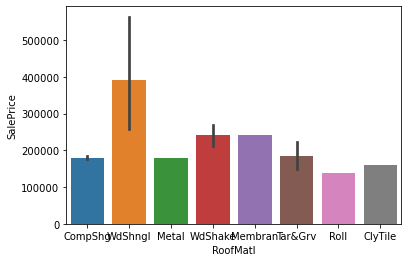

In [85]:
sns.barplot(data = train, x = 'RoofMatl', y = 'SalePrice')

- 대체적으로 CompShg를 쓰는것 같지만 WdShngl을 쓰는 사람들은 더 높은 가격이 형성되어 있다.

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

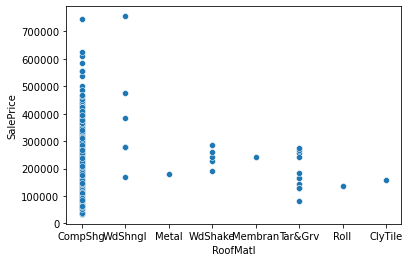

In [86]:
sns.scatterplot(data = train, x = 'RoofMatl', y = 'SalePrice')

In [87]:
sub_function('RoofMatl')

train_set 에만 있는 값 {'Roll', 'ClyTile', 'Metal', 'Membran'}
test_set 에만 있는 값 set()


- 한개만 있는 것들이 전부 test에 없다.
- 이것은 전처리를 어케 해주어야 할지 고민해 봐야 겠다.
- 1. 저 4개를 전부 other로 빼도 되는 것인가?
- 2. 저 데이터 4개를 지우자니 데이터가 너무 없다.

## Exterior1st(주택의 외장)

In [88]:
train['Exterior1st'].isnull().sum()

0

In [89]:
train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

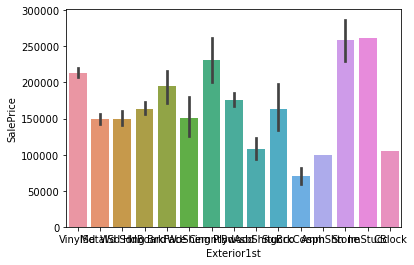

In [90]:
sns.barplot(data = train, x = 'Exterior1st', y = 'SalePrice')

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

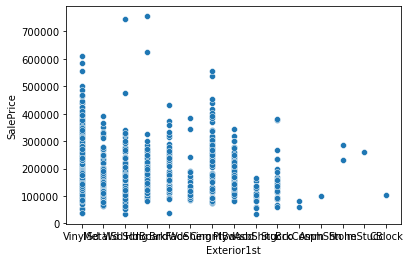

In [91]:
sns.scatterplot(data = train, x = 'Exterior1st', y = 'SalePrice')

In [92]:
sub_function('Exterior1st')

train_set 에만 있는 값 {'ImStucc', 'Stone'}
test_set 에만 있는 값 {nan}


## Exterior2nd(주택의 외장이 2개 이상)

In [93]:
train.Exterior2nd.isnull().sum()

0

In [94]:
train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

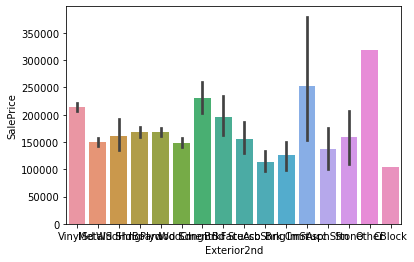

In [95]:
sns.barplot(data = train, x = 'Exterior2nd',y = 'SalePrice')

In [96]:
sub_function('Exterior2nd')

train_set 에만 있는 값 {'Other'}
test_set 에만 있는 값 {nan}


## MasVnrType(석조 유형)

In [97]:
train.MasVnrType.isna().sum()

8

In [98]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

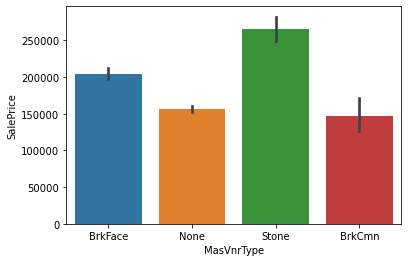

In [99]:
sns.barplot(data = train, x = 'MasVnrType', y = 'SalePrice')

In [100]:
a=pd.get_dummies(train['MasVnrType'])
b = pd.DataFrame(train['SalePrice'])
c = pd.concat([a,b], axis = 1)

<AxesSubplot:>

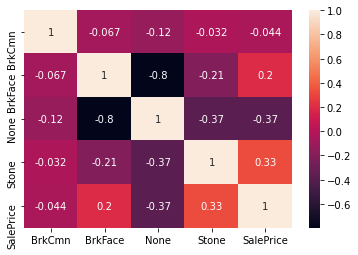

In [101]:
mat_corr=c.corr()
sns.heatmap(mat_corr, annot = True)

In [102]:
sub_function('MasVnrType')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


- 결측치는 median으로 바꿔주는게 제일 낫지 않을까?

## MasVnrArea(평방 피트 단위의 벽돌 무늬 겉치장)

In [103]:
train.MasVnrArea.isnull().sum()

8

In [104]:
train.MasVnrArea.value_counts()
# 0에 많이 분포하고 있다는 것을 알 수 있다.

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

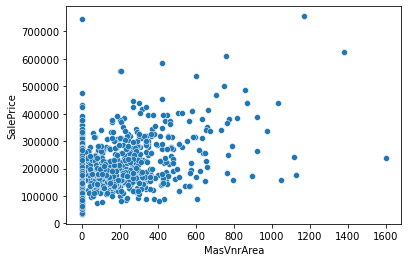

In [105]:
sns.scatterplot(data = train, x = 'MasVnrArea', y = 'SalePrice')

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

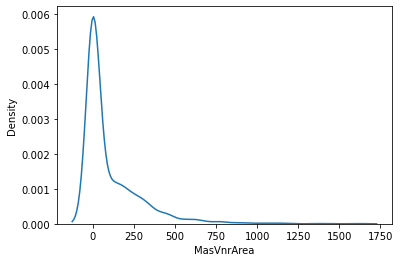

In [106]:
sns.kdeplot(x = train['MasVnrArea'])

- 결측치는 median으로 바꿔주는게 제일 낫지 않을까?

## ExterQual

In [107]:
train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

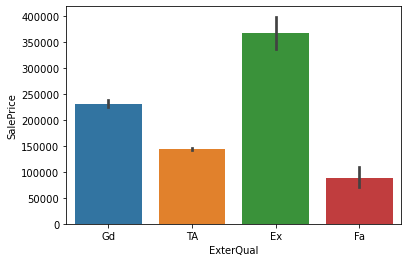

In [108]:
sns.barplot(data = train, x = 'ExterQual', y = 'SalePrice')

- 높은 순으로 높은 값이 형성되어 있다.

In [109]:
sub_function('ExterQual')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## ExterCond (외부 재질의 현재 상태를 평가)

In [110]:
train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

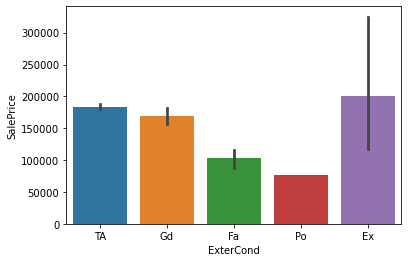

In [111]:
sns.barplot(data = train, x = 'ExterCond', y = 'SalePrice')

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

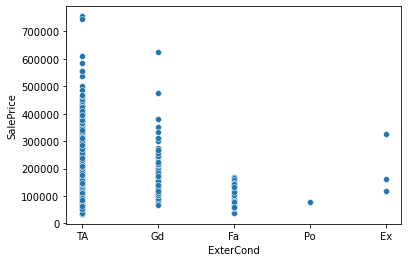

In [112]:
sns.scatterplot(data = train, x = 'ExterCond', y = 'SalePrice')

In [113]:
sub_function('ExterCond')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## Foundation(기초공사)

In [114]:
train.Foundation.isnull().sum()

0

In [115]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

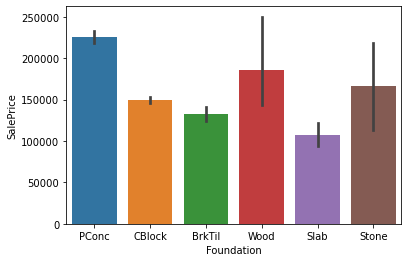

In [116]:
sns.barplot(data = train, x = 'Foundation', y = 'SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

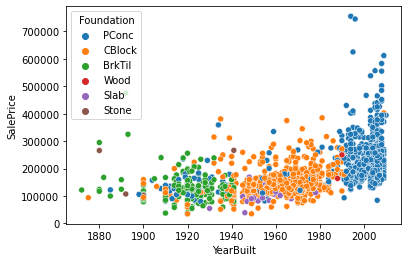

In [117]:
sns.scatterplot(data =train, x = 'YearBuilt', y = 'SalePrice', hue = 'Foundation')

- BrkTil	Brick & Tile
- CBlock	Cinder Block
- PConc	Poured Contrete	
- Slab	Slab
- Stone	돌
- Wood 나무

In [118]:
sub_function('Foundation')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


# BsmtQual(지하실 높이)

In [119]:
train.BsmtQual.isnull().sum()

37

In [120]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

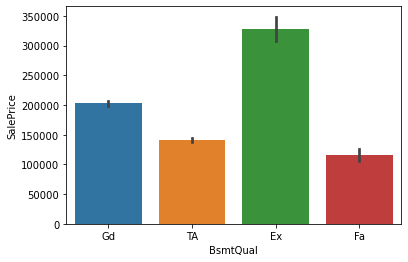

In [121]:
sns.barplot(data =train, x = 'BsmtQual', y = 'SalePrice', hue_order = 'BsmtQual')

- 보면 지하실의 높이의 경우 EX -> Gd -> TA -> Fa
- 지하실의 높을경우 높은 값이 형성되어 있다.

In [122]:
sub_function('BsmtQual')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## BsmtCond

In [123]:
train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

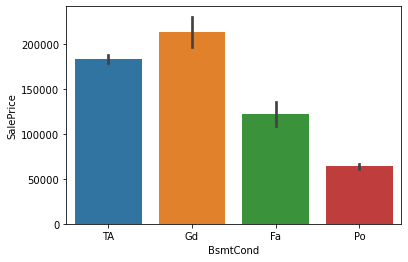

In [124]:
sns.barplot(data =train, x = 'BsmtCond', y = 'SalePrice')

- 지하실의 컨디션이 좋을수록 높은 가격이 형성되어 있다.

In [125]:
sub_function('BsmtCond')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## BsmtExposure

In [126]:
train.BsmtExposure.isnull().sum()

38

In [127]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

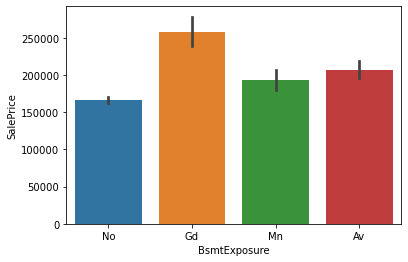

In [128]:
sns.barplot(data = train, x = 'BsmtExposure', y = 'SalePrice')

- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage
- 높을 수록 높게 형성되어 있다!!

In [129]:
sub_function('BsmtExposure')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## BsmtFinType1(지하실 완성 면적 등급)

In [130]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

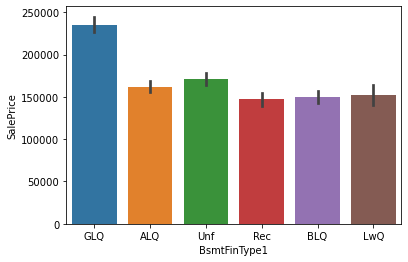

In [131]:
sns.barplot(data = train, x = 'BsmtFinType1',y = 'SalePrice' )

- GLO -> 좋은 생활 공간
- ALQ -> 평균 거주 구역
- BLQ -> 평균 거주지 이하
- REC ->  ?
- LWQ -> 저품질
- UNF -> 미완성
- NA -> 지하실 없음

In [132]:
sub_function('BsmtFinType1')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## BsmtFinSF1(유형 1 완성 된 평방 피트)

In [133]:
train.BsmtFinSF1.isnull().sum()

0

In [134]:
train.BsmtFinSF1

0       706
1       978
2       486
3       216
4       655
       ... 
1455      0
1456    790
1457    275
1458     49
1459    830
Name: BsmtFinSF1, Length: 1460, dtype: int64

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

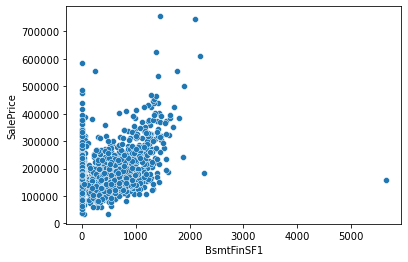

In [135]:
sns.scatterplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice')

In [136]:
train_cor=train[['BsmtFinSF1','SalePrice']].corr()
print(train_cor)

# 집값에 연관이 있는 변수가 확싫하다!!

            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.38642
SalePrice      0.38642    1.00000


## BsmtFinType2(지하실 마감 면적 등급)

In [137]:
train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

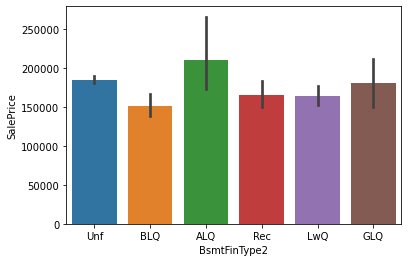

In [138]:
sns.barplot(data =train, x = 'BsmtFinType2', y = 'SalePrice')

- GLO -> 좋은 생활 공간
- ALQ -> 평균 거주 구역
- BLQ -> 평균 거주지 이하
- REC ->  ?
- LWQ -> 저품질
- UNF -> 미완성
- NA -> 지하실 없음

In [139]:
sub_function('BsmtFinType2')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## BsmtFinSF2(완성 된 평방 피트)

In [140]:
train.BsmtFinSF2

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456     163
1457       0
1458    1029
1459     290
Name: BsmtFinSF2, Length: 1460, dtype: int64

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

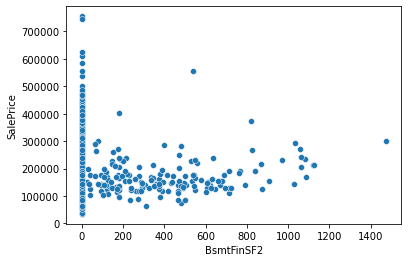

In [141]:
sns.scatterplot(data = train, x = 'BsmtFinSF2', y = 'SalePrice')

In [142]:
train_corr=train[['BsmtFinSF2', 'SalePrice']].corr()
print(train_corr)

# corr이 높지 않은것으로 보아 집값과는 연관이 없다고 판단된다.

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.011378
SalePrice    -0.011378   1.000000


## BsmtUnfSF(미완성 된 지하실 면적)

In [143]:
train.BsmtUnfSF

0       150
1       284
2       434
3       540
4       490
       ... 
1455    953
1456    589
1457    877
1458      0
1459    136
Name: BsmtUnfSF, Length: 1460, dtype: int64

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

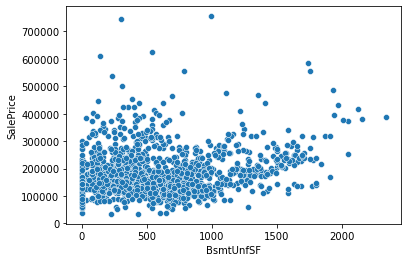

In [144]:
sns.scatterplot(data = train, x = 'BsmtUnfSF', y = 'SalePrice')

In [145]:
train_corr=train[['BsmtUnfSF','SalePrice']].corr()
print(train_corr)

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.214479
SalePrice   0.214479   1.000000


- 이 데이터의 경우 상관계수가 0.21임으로 관련이 있다고 말할 수는 있을 것 같다.

## TotalBsmtSF(지하 총 평방 피트)

In [146]:
train.TotalBsmtSF

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

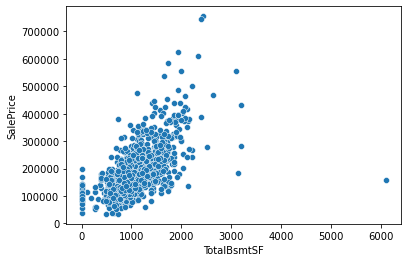

In [147]:
sns.scatterplot(data =train, x = 'TotalBsmtSF', y ='SalePrice')

In [148]:
train_corr=train[['TotalBsmtSF','SalePrice']].corr()
print(train_corr)

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000


- 다중공산성에 위배될 수 있는 데이터이기 때문에 회의할 때 물어봐야겟다

## Heating(가열 유형)

In [149]:
train.Heating

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1460, dtype: object

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

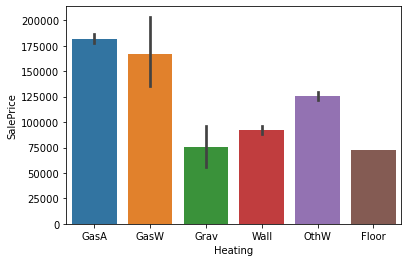

In [150]:
sns.barplot(data= train, x = 'Heating', y = 'SalePrice')

In [151]:
sub_function('Heating')

train_set 에만 있는 값 {'Floor', 'OthW'}
test_set 에만 있는 값 set()


- Floor -> Floor Furnace
- GasA -> 가스 강제 온풍로
- GasW -> 가스 온수 또는 증기 열
- Grav -> 중력식 온풍 난방
- OthW -> 가스 이외의 온수 또는 증기 열
- Wall -> 벽난로

## HeatingQC(난방 품질 및 상태)

In [152]:
train.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

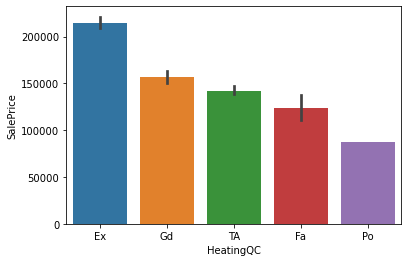

In [153]:
sns.barplot(data = train, x = 'HeatingQC', y = 'SalePrice')

- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor

# CentralAir(중앙 에어컨)

In [154]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

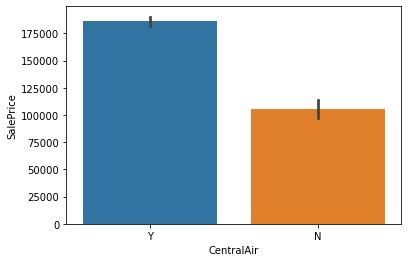

In [155]:
sns.barplot(data = train, x = 'CentralAir', y = 'SalePrice')

- 영향이 당연히 있는것 같다

# Electrical(전기 시스템)

In [156]:
train.Electrical.isnull().sum()

1

In [157]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

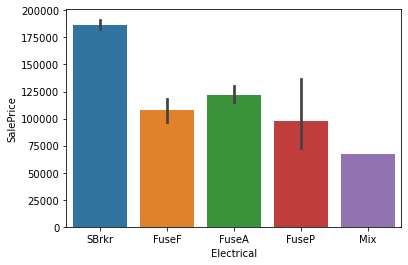

In [158]:
sns.barplot(data = train, x = 'Electrical', y = 'SalePrice')

In [159]:
sub_function('Electrical')

train_set 에만 있는 값 {nan, 'Mix'}
test_set 에만 있는 값 set()


- SBrkr	-> 표준 회로 차단기 및 Romex
- FuseA	-> 60 AMP 이상의 퓨즈 박스 및 모든 Romex 배선 (평균)
- FuseF	-> 60 AMP 퓨즈 박스 및 대부분 Romex 배선 (공정)
- FuseP	-> 60 AMP 퓨즈 박스 및 대부분 손잡이 및 튜브 배선 (불량)
- Mix	-> 혼합

## 1stFlrSF(1 층 평방 피트)

In [160]:
train['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

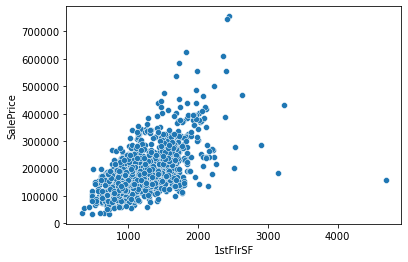

In [161]:
sns.scatterplot(data = train, x = '1stFlrSF', y = 'SalePrice')

In [162]:
train_corr=train[['1stFlrSF','SalePrice']].corr()
print(train_corr)

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  0.605852   1.000000


- 강한 연관성을 가지고 있다.

## 2ndFlrSF(2 층 평방 피트)

In [163]:
train['2ndFlrSF']

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1460, dtype: int64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

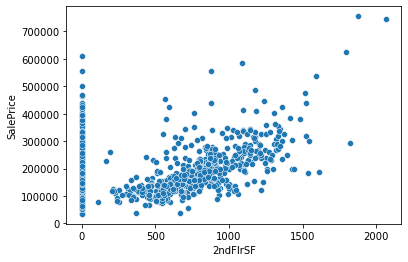

In [164]:
sns.scatterplot(data = train, x = '2ndFlrSF', y = 'SalePrice')

In [165]:
train_corr=train[['2ndFlrSF', 'SalePrice']].corr()
print(train_corr)

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.319334
SalePrice  0.319334   1.000000


- 1층 평방피트에 비해서 집값에 영향을 주지 않는다.

## LowQualFinSF(저품질 마감 평방 피트 (모든 층))

In [166]:
train.LowQualFinSF.value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

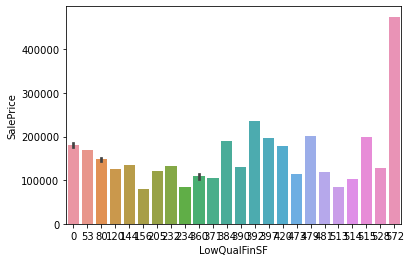

In [167]:
sns.barplot(data = train, x = 'LowQualFinSF', y = 'SalePrice')

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

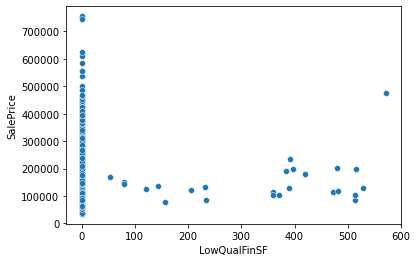

In [168]:
sns.scatterplot(data = train, x = 'LowQualFinSF', y = 'SalePrice')

- 이 데이터는 연관이 없다고 판단하기 때문에 제거할 예정이다.

## GrLivArea(지상 (지상) 거실 면적 평방 피트 위)

In [169]:
train.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

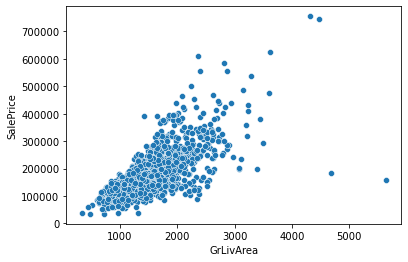

In [170]:
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice')

In [171]:
train_corr=train[['GrLivArea','SalePrice']].corr()
print(train_corr)

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000


- 집 값과 강한 연관성을 내포하고 있다.

## BsmtFullBath(지하 전체 욕실)

In [172]:
train.BsmtFullBath

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: int64

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

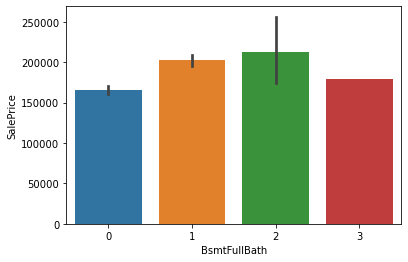

In [173]:
sns.barplot(data = train, x = 'BsmtFullBath', y ='SalePrice')

- 데이터를 살펴 볼 때 화장실의 개수와는 연관이 없다고 판단해도 되는지
- 아니면 1과 2를 보고 0개와 3개보단 높다고 판단할지 모르겠다.

## BsmtHalfBath(지하 절반 욕실)

In [174]:
train.BsmtHalfBath.isnull().sum()

0

In [175]:
train.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

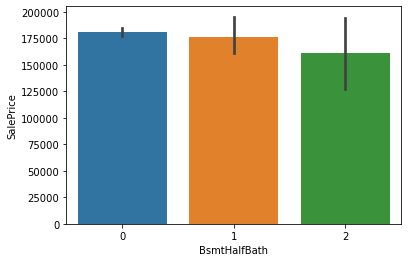

In [176]:
sns.barplot(data = train,  x = 'BsmtHalfBath', y = 'SalePrice')

In [177]:
sub_function('BsmtHalfBath')

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan}


## FullBath(Full bathrooms above grade)

In [178]:
train.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

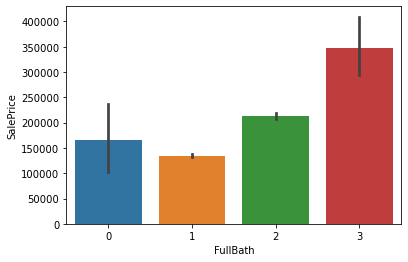

In [179]:
sns.barplot(data = train,x = 'FullBath', y ='SalePrice')

In [180]:
train_corr=train[['FullBath', 'SalePrice']].corr()
print(train_corr)

           FullBath  SalePrice
FullBath   1.000000   0.560664
SalePrice  0.560664   1.000000


- 높은 상관관계는 있지만 0번과 1번을 봤을 때 높을 수록 상관관계가 있다? 이건 잘 모르겠다.

## HalfBath(학년 이상의 절반 목욕)

In [181]:
train.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

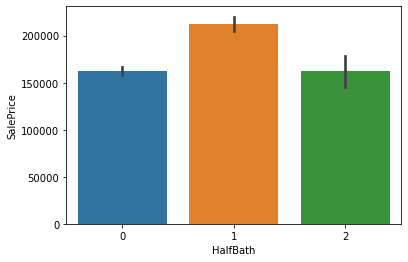

In [182]:
sns.barplot(data = train, x = 'HalfBath', y = 'SalePrice')

In [183]:
sub_function('HalfBath')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## KitchenAbvGr(지상 위의 주방)

In [184]:
train.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

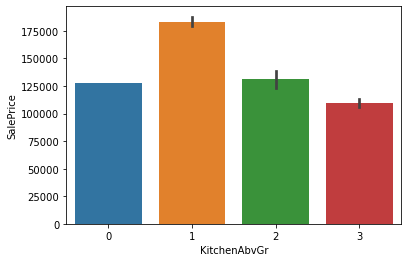

In [185]:
sns.barplot(data = train, x = 'KitchenAbvGr', y = 'SalePrice')

In [186]:
sub_function('KitchenAbvGr')

train_set 에만 있는 값 {3}
test_set 에만 있는 값 set()


## KitchenQual(주방 품질)

In [187]:
train.KitchenQual.isnull().sum()

0

In [188]:
train.KitchenQual

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    TA
Name: KitchenQual, Length: 1460, dtype: object

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

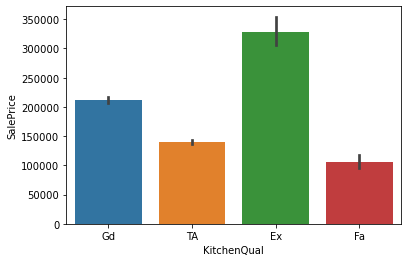

In [189]:
sns.barplot(data = train, x = 'KitchenQual', y = 'SalePrice')

In [190]:
sub_function('KitchenQual')

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan}


- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor

- 높을수록 높은 가격이 매겨진다.!!

## TotRmsAbvGrd(등급 이상의 총 방 (욕실은 포함되지 않음))

In [191]:
train.TotRmsAbvGrd

0       8
1       6
2       6
3       7
4       9
       ..
1455    7
1456    7
1457    9
1458    5
1459    6
Name: TotRmsAbvGrd, Length: 1460, dtype: int64

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

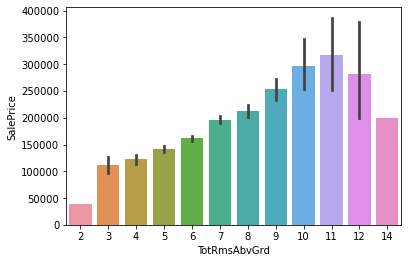

In [192]:
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

- 대체적으로 방이 많으면 높은 가격이 형성된다.
- 그러나 14의 경우 11개의 방 이상의 경우 이상하게 측정된다.

In [193]:
sub_function('TotRmsAbvGrd')
# 테스트 셋에는 더 높은 방들이 존재한다.

train_set 에만 있는 값 {2, 14}
test_set 에만 있는 값 {13, 15}


## Functional(홈 기능 (공제가 보장되지 않는 한 일반적인 가정))

In [194]:
train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

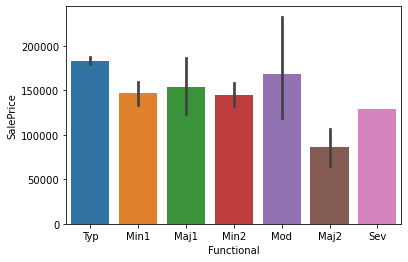

In [195]:
sns.barplot(data = train, x = 'Functional', y = 'SalePrice')

In [196]:
sub_function('Functional')
# 테스트 셋에는 nan이 존재한다.

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan}


- Typ	일반적인 기능
- Min1	경미한 공제 1
- Min2	경미한 공제 2
- Mod   중간 공제
- Maj1	주요 공제1
- Maj2	주요 공제 2
- Sev	심각한 손상
- Sal	구제

In [197]:
sub_function('Functional')

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan}


## Fireplaces(벽난로 수)

In [198]:
train.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

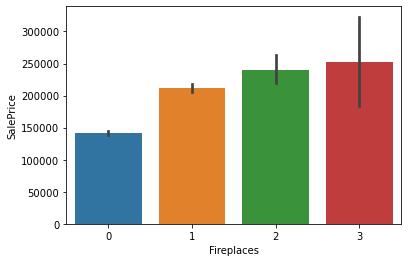

In [199]:
sns.barplot(data = train, x = 'Fireplaces', y = 'SalePrice')

In [200]:
sub_function('Fireplaces')

train_set 에만 있는 값 set()
test_set 에만 있는 값 {4}


## FireplaceQu(벽난로 품질)

In [201]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [202]:
train.FireplaceQu.isnull().sum()

690

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

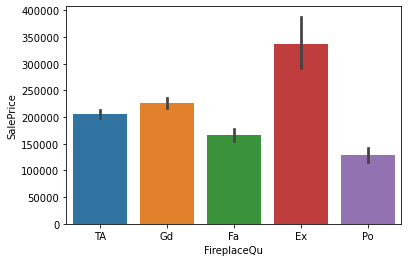

In [203]:
sns.barplot(data = train, x = 'FireplaceQu', y = 'SalePrice')

- 상태가 좋을수록 높은 가격대가 형성되는건 사실이다.

In [204]:
sub_function('FireplaceQu')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


# GarageType(차고 위치)

In [205]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

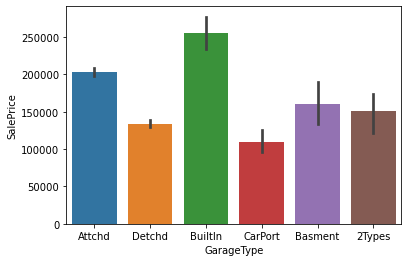

In [206]:
sns.barplot(data = train, x = 'GarageType', y = 'SalePrice')

- 2Types	여러 유형의 차고
- Attchd	집에 첨부
- Basment	지하 차고
- BuiltIn	빌트인 (집의 차고 부분-일반적으로 차고 위에 공간이 있음)
- CarPort	자동차 포트
- Detchd	집에서 분리됨
- NA	차고 없음

In [207]:
sub_function('GarageType')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## GarageYrBlt(Year garage was built)

In [208]:
train.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [209]:
train_corr=train[['GarageYrBlt', 'SalePrice']].corr()
print(train_corr)

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.486362
SalePrice       0.486362   1.000000


- GarageVrBlt는 가격과 높은 상관관계를 가진다.

## GarageFinish(차고 내부 마감)

In [210]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

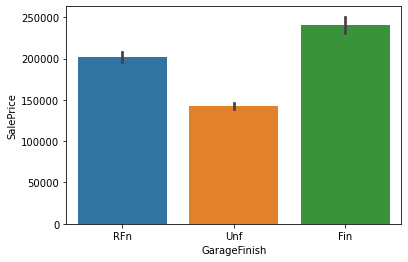

In [211]:
sns.barplot(data =train, x = 'GarageFinish', y = 'SalePrice')

- Fin	끝마친
- RFn	거친 마무리
- Unf	마무리가 안됬다.
- NA	차고가 없다.

In [212]:
sub_function('GarageFinish')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## GarageCars(차량 용량의 차고 크기)

In [213]:
train.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

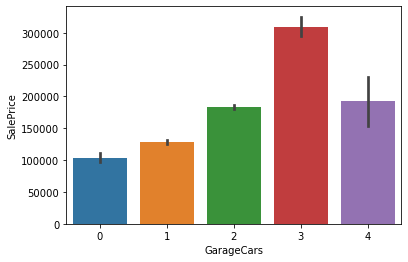

In [214]:
sns.barplot(data = train, x = 'GarageCars', y = 'SalePrice')

- 강한 연관성이 있는 것 같다.

In [215]:
sub_function('GarageCars')
# nan과 5가 test셋에는 들어가 있다.

train_set 에만 있는 값 set()
test_set 에만 있는 값 {nan, 5.0}


# GarageArea(평방 피트 단위의 차고 크기)

In [216]:
train.GarageArea

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

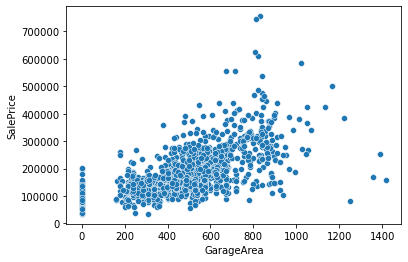

In [217]:
sns.scatterplot(data =train, x = 'GarageArea', y = 'SalePrice')

In [218]:
train_corr=train[['GarageArea','SalePrice']].corr()
print(train_corr)

            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000


- 높은 연관성이 있다.
- 이것은 중요한 변수가 될 것이다.

## GarageQual(차고 품질)

In [219]:
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

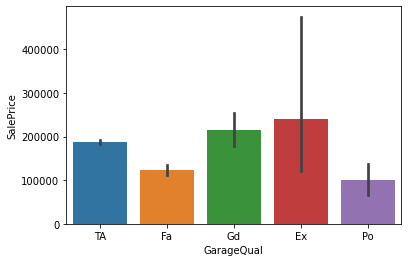

In [220]:
sns.barplot(data = train, x = 'GarageQual', y = 'SalePrice')

- 높은 등급일수록 높은 가격이 형성되어있다.

In [221]:
sub_function('GarageQual')

train_set 에만 있는 값 {'Ex'}
test_set 에만 있는 값 set()


## GarageCond(차고 상태)

In [222]:
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

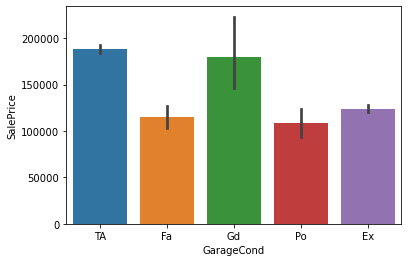

In [223]:
sns.barplot(data = train, x = 'GarageCond', y = 'SalePrice')

- 이상하다.... 어디가 이상한건지 모르겟다 왜 이렇지?

## PavedDrive(포장된 진입로)

In [224]:
train.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

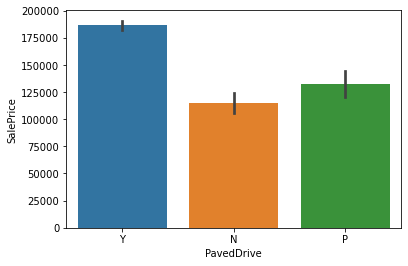

In [225]:
sns.barplot(data = train, x = 'PavedDrive', y = 'SalePrice')

- Y	Paved 
- P	Partial Pavement
- N	Dirt/Gravel
- 포장된 진입로 일수록 더 많은 가격인 것을 알 수 있다.

## WoodDeskSF

In [226]:
train.WoodDeckSF.isnull().sum()

0

In [227]:
train.WoodDeckSF.value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

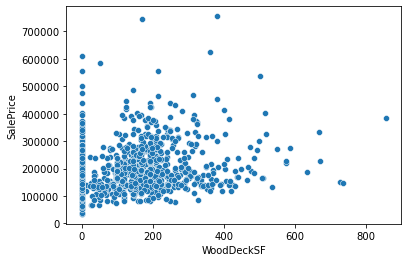

In [228]:
sns.scatterplot(data = train, x = 'WoodDeckSF', y = 'SalePrice')

<AxesSubplot:>

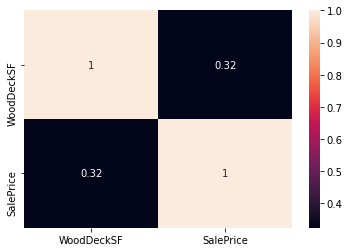

In [229]:
WoodDeckSF_corr = train[['WoodDeckSF','SalePrice']].corr()
sns.heatmap(WoodDeckSF_corr, annot = True)

- 선형관계가 있다? 없다?
- 아까 도크에서 나온 wood인사람중에 높을 때 높은지 낮을 때 낮은지 확인해 봐야겠다

## OpenPorchSF(오픈 베란다 면적)

In [230]:
train.OpenPorchSF.isnull().sum()

0

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

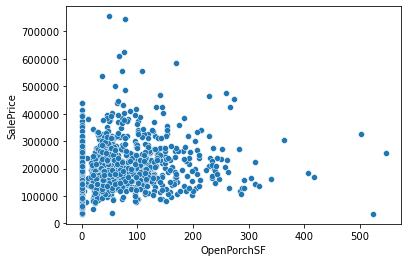

In [231]:
sns.scatterplot(data = train, x = 'OpenPorchSF', y = 'SalePrice')

In [232]:
train_corr=train[['OpenPorchSF','SalePrice']].corr()
print(train_corr)

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.315856
SalePrice       0.315856   1.000000


In [233]:
def test1(x):
    if x == 0:
        return 0
    elif x == 1:
        return 0.3
    else:
        return np.log(x)

In [234]:
train['OpenPorchSF_1'] = train['OpenPorchSF'].apply(test1)

In [235]:
train_corr=train[['OpenPorchSF_1', 'SalePrice']].corr()
print(train_corr)

               OpenPorchSF_1  SalePrice
OpenPorchSF_1       1.000000   0.430243
SalePrice           0.430243   1.000000


- 이 데이터의 경우 정규화를 한 후에 데이터를 넣어주면 더 높은 상관관계를 나타낸다.

## EnclosedPorch(닫힌 현관 영역 (평방 피트))

In [236]:
train.EnclosedPorch

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

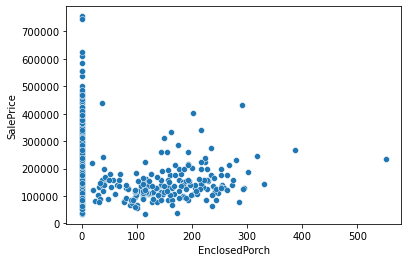

In [237]:
sns.scatterplot(data =train, x = 'EnclosedPorch', y = 'SalePrice')

In [238]:
train_corr=train[['EnclosedPorch','SalePrice']].corr()
print(train_corr)

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.128578
SalePrice          -0.128578   1.000000


- 이것은 재영이와 상의해보자.

## 3SsnPorch(3 계절 현관 면적 (평방 피트))

In [239]:
train['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

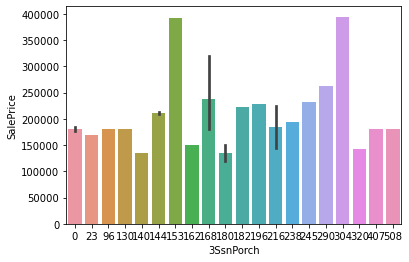

In [240]:
sns.barplot(data =train, x = '3SsnPorch', y = 'SalePrice')

In [241]:
train_corr = train[['3SsnPorch','SalePrice']].corr()
print(train_corr)

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.044584
SalePrice   0.044584   1.000000


- 이 데이터는 필요가 없는 데이터인것 같다 나중에 제거해주도록 하던가 아니면 다른것과 병합해서 사용하도록 하자.

## ScreenPorch(스크린 현관 영역 (제곱 피트))

In [242]:
train.ScreenPorch.value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

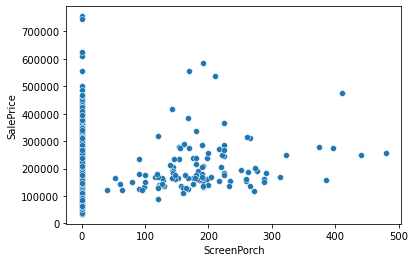

In [243]:
sns.scatterplot(data =train, x = 'ScreenPorch', y = 'SalePrice')

In [244]:
train_corr=train[['ScreenPorch','SalePrice']].corr()
print(train_corr)

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.111447
SalePrice       0.111447   1.000000


- 확실히는 모르겠다.

## PoolArea(수영장 면적 (평방 피트))

In [245]:
train.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

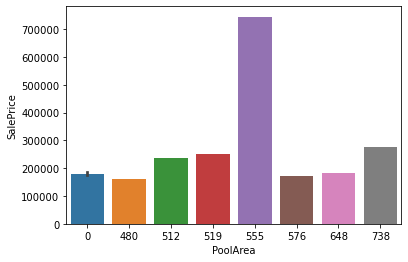

In [246]:
sns.barplot(data = train, x = 'PoolArea', y = 'SalePrice')

- 없는 것보다는 다 높은 가격대를 형성하는 것 같다.

In [247]:
train_corr  =train[['PoolArea', 'SalePrice']].corr()
print(train_corr)

           PoolArea  SalePrice
PoolArea   1.000000   0.092404
SalePrice  0.092404   1.000000


- 그러나 선형관계가 이루어 지지 않았다 그러므로 다른 데이터와 섞어쓰거나 하는게 좋은 것 같다.

## PoolQC(Pool quality)

In [248]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

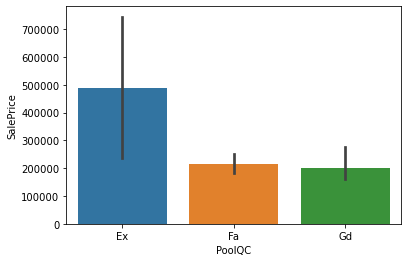

In [249]:
sns.barplot(data = train, x = 'PoolQC', y = 'SalePrice')
# 7개 밖에 없는 변수여서 건드려야 하는지는 고민해 봐야 겠다.

## Fence(울타리 품질)

In [250]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

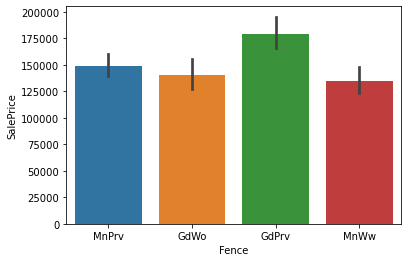

In [251]:
sns.barplot(data = train, x = 'Fence', y = 'SalePrice')

- GdPrv	Good Privacy
- MnPrv	Minimum Privacy
- GdWo	Good Wood
- MnWw	Minimum Wood/Wire
- NA	No Fence

나무로 되어있는 것보다 privacy로 되어있는 것이 더 높은 가격을 형성한다.

In [252]:
sub_function('Fence')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## MiscFeature(다른 카테고리에서 다루지 않는 기타 기능)

In [253]:
train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

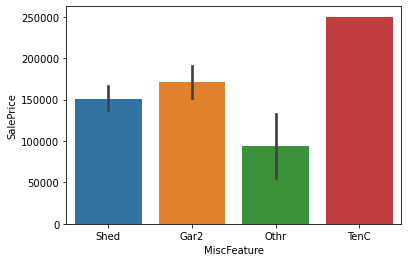

In [254]:
sns.barplot(data = train, x = 'MiscFeature', y = 'SalePrice')

- Elev	엘리베이터
- Gar2	2nd Garage (차고 섹션에 설명되어 있지 않은 경우)
- Othr	기타
- Shed	창고 (100 SF 이상)
- TenC	테니스 코트
- NA	None

- nan이 너무 많지만 이것은 없다는 걸로 판단하고 없음으로 대체한다.

In [255]:
train['MiscFeature']=train['MiscFeature'].fillna('없음')

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

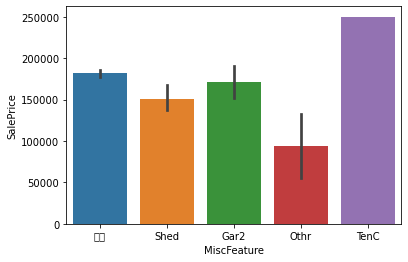

In [256]:
sns.barplot(data = train, x = 'MiscFeature', y = 'SalePrice')

- 테니스 코트 이외에 다른 기타 기능이 있다고 가격이 높아지지 않았다.

## MiscVal($ 기타 기능의 가치)

In [257]:
train.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

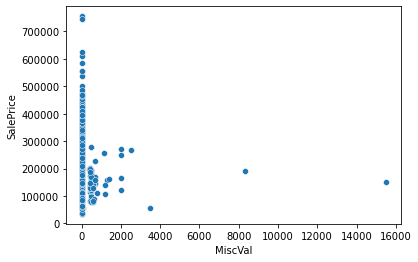

In [258]:
sns.scatterplot(data = train, x = 'MiscVal', y = 'SalePrice')

In [259]:
train_corr = train[['MiscVal','SalePrice']].corr()
print(train_corr)

           MiscVal  SalePrice
MiscVal    1.00000   -0.02119
SalePrice -0.02119    1.00000


- 이것 또한 상관성이 높지 않다.

## MoSold(판매 된 달)

In [260]:
train.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

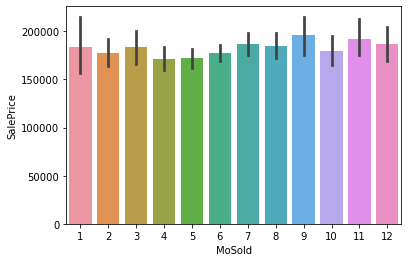

In [261]:
sns.barplot(data = train, x = 'MoSold', y= 'SalePrice')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

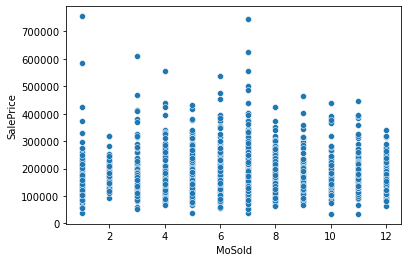

In [262]:
sns.scatterplot(data = train, x = 'MoSold',y = 'SalePrice')

- 이상치가 있는 1월 3월 7월이 있다.

## YrSold(판매 연도 (YYYY))

In [263]:
train.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

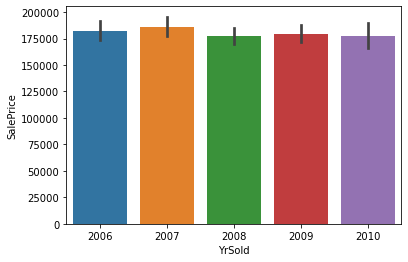

In [264]:
sns.barplot(data = train, x = 'YrSold', y = 'SalePrice')

In [265]:
sub_function('YrSold')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


## SaleType(판매 유형)

In [266]:
train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

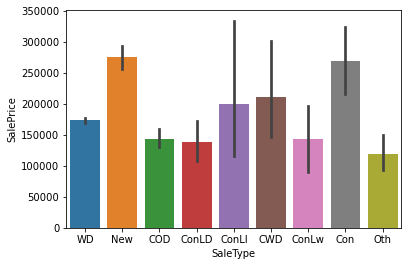

In [267]:
sns.barplot(data = train, x = 'SaleType',y = 'SalePrice')

- WD 	보증 증서-기존
- CWD	보증 증서-현금
- VWD	보증 증서-VA 대출
- New	방금 건설 및 판매 된 집
- COD	법원 장교 증서 / 부동산
- Con	계약 15 % 계약금 일반 조건
- ConLw	계약 낮은 계약금 및 낮은이자
- ConLI	낮은이자 계약
- ConLD	계약 낮음
- Oth	기타

- new에 있는게 가장 높고 그 이외에도 가격이 몇몇개가 높게 형성되어있다.

## SaleCondition(판매 조건)

In [268]:
train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

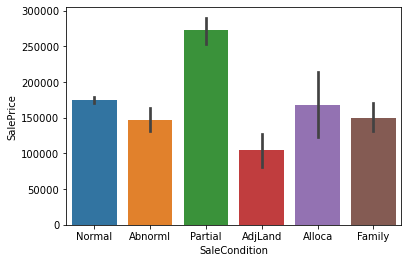

In [269]:
sns.barplot(data = train, x = 'SaleCondition', y = 'SalePrice')

In [270]:
sub_function('SaleCondition')

train_set 에만 있는 값 set()
test_set 에만 있는 값 set()


- Normal	일반 판매
- Abnorml	비정상적인 판매-무역, 압류, 공매
- AdjLand	인접한 토지 매입
- Alloca	할당-별도의 증서가있는 두 개의 연결된 부동산, 일반적으로 차고 유닛이있는 콘도	
- Family	가족 간 판매
- Partial	마지막으로 평가했을 때 집이 완성되지 않았습니다 (새 집과 관련됨).

- Partial의 경우 집이 완성되지 않았음 즉, 새집이라 가격이 높게 측정 되었고
- AdjLand같은경우는 인접한 토지 매입인데 이부분이 어떻게 데이터에 적용될지는 모르겠다.

- 이렇게 전처리를 끝내 보았는데 봐야할 데이터가 너무 많다.

<AxesSubplot:>

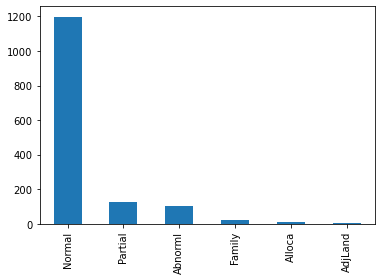

In [271]:
train['SaleCondition'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='SaleCondition'>

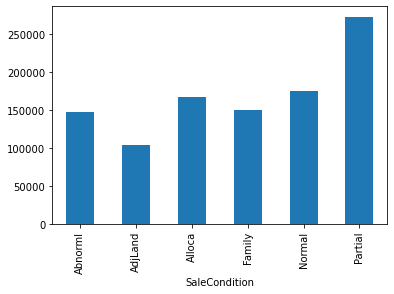

In [272]:
train.groupby('SaleCondition')['SalePrice'].mean().plot(kind = 'bar')